# Assignment 3   Data Visualization with Python
<b>Skill Development Lab</b>
![Olympic Medals](https://assets3.thrillist.com/v1/image/2740765/size/gn-gift_guide_variable_c_2x.jpg)

## By Yagnik Bhargav
#### PRN : 17070122077  ----- CS-3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
dic= pd.read_csv('archive/dictionary.csv')
summer=pd.read_csv('archive/summer.csv')
winter=pd.read_csv('archive/winter.csv')

In [3]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [4]:
summer=summer.rename(columns={"Country": "Code"})

In [5]:
winter=winter.rename(columns={"Country": "Code"})

In [6]:
summer=pd.merge(summer,dic,how='left',on='Code')

In [7]:
winter=pd.merge(winter,dic,how='left',on='Code')

In [8]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,10823732.0,18002.230578


In [9]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Switzerland,8286976.0,80945.079219


## Plot Medals won each year from 1896 (Summer Olympics)

Text(0, 0.5, 'No.of Medals')

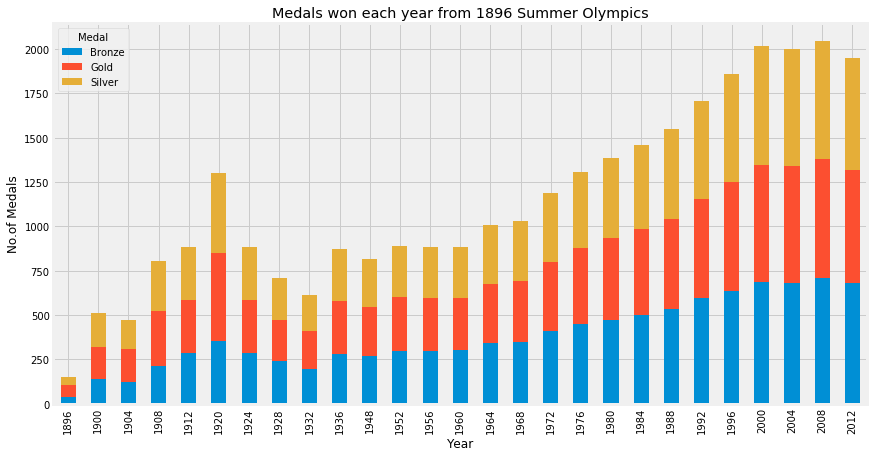

In [10]:
summer.groupby(['Year'])['Medal'].value_counts().unstack().plot.bar(stacked=True,figsize=(13,7))
plt.title('Medals won each year from 1896 Summer Olympics')
plt.ylabel('No.of Medals')

## Plot Medals won each year from 1924 (Winter Olympics)

Text(0, 0.5, 'No.of Medals')

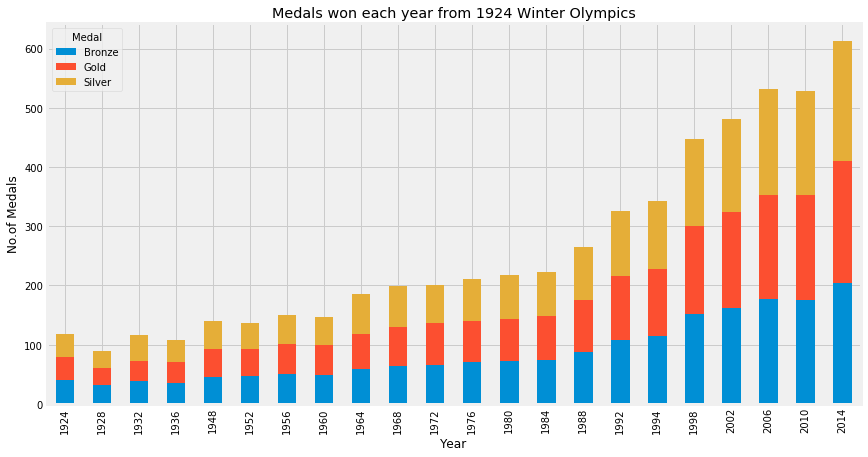

In [11]:
winter.groupby(['Year'])['Medal'].value_counts().unstack().plot.bar(stacked=True,figsize=(13,7))
plt.title('Medals won each year from 1924 Winter Olympics')
plt.ylabel('No.of Medals')

## Plot of Medals won by top 20 Countries in Summer Olympics

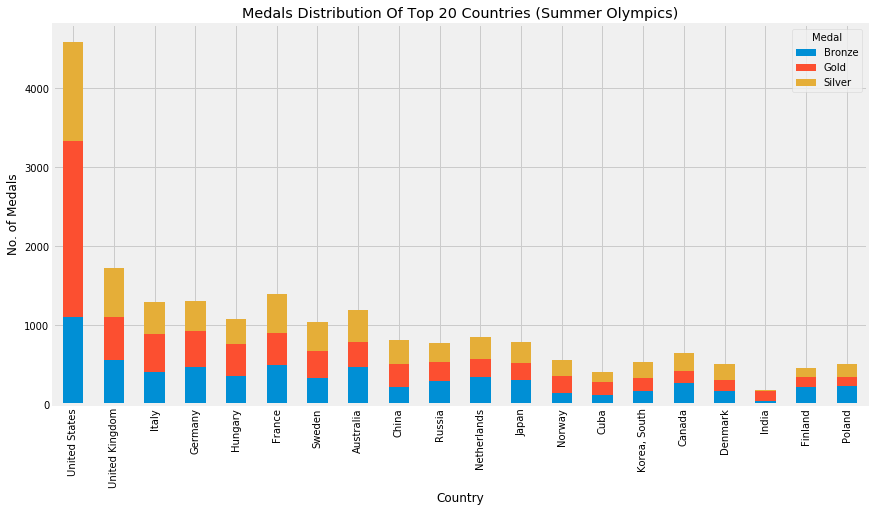

In [12]:
medals_country=summer.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:20]
top.plot.bar(stacked=True,figsize=(13,7))
plt.title('Medals Distribution Of Top 20 Countries (Summer Olympics)')
plt.ylabel('No. of Medals')
plt.show()

<div style="page-break-after: always;"></div>
<div>&nbsp;
</div>

## Plot of Medals won by top 20 Countries in Winter Olympics

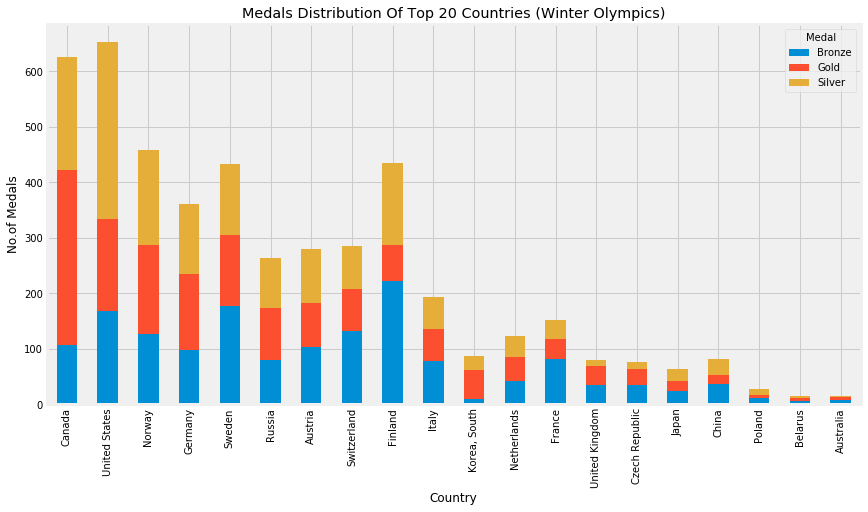

In [13]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot('Country','Medal','Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:20]
top.plot.bar(stacked=True,figsize=(13,7))
plt.title('Medals Distribution Of Top 20 Countries (Winter Olympics)')
plt.ylabel('No.of Medals')
plt.show()

<div style="page-break-after: always;"></div>
<div>&nbsp;
</div>

## Plot of Medals won by top 10 Countries in Summer Olympics in respective games

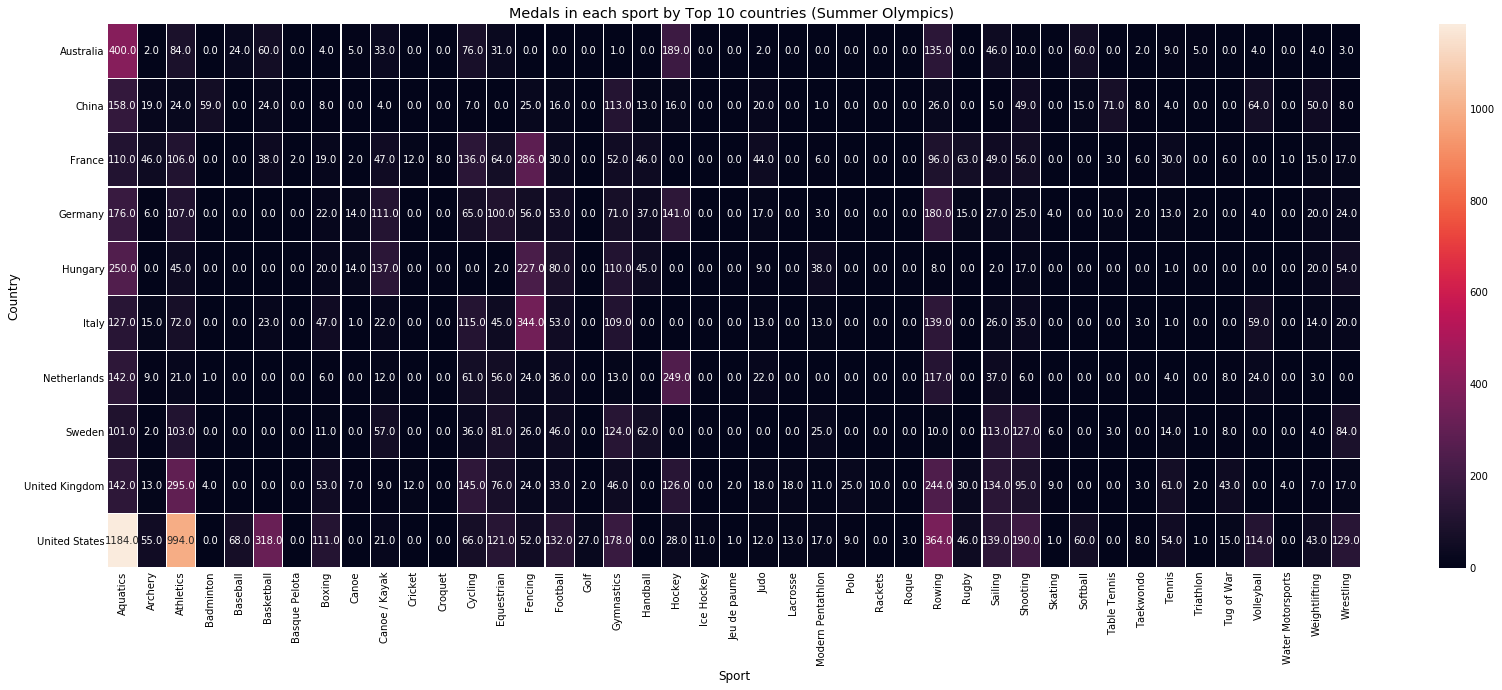

In [14]:
x=summer[summer['Country'].isin(summer['Country'].value_counts()[:10].index)].groupby(['Country','Sport'])['Year'].count().unstack().fillna(0)
plt.figure(figsize=(25,10))
sns.heatmap(x, annot=True, linewidths=0.1,fmt='0.1f')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Medals in each sport by Top 10 countries (Summer Olympics) ')
plt.show() # ta-da!

<p style="page-break-after:always;"></p>

## Plot of Medals won by top 10 Countries in Winter Olympics in respective games

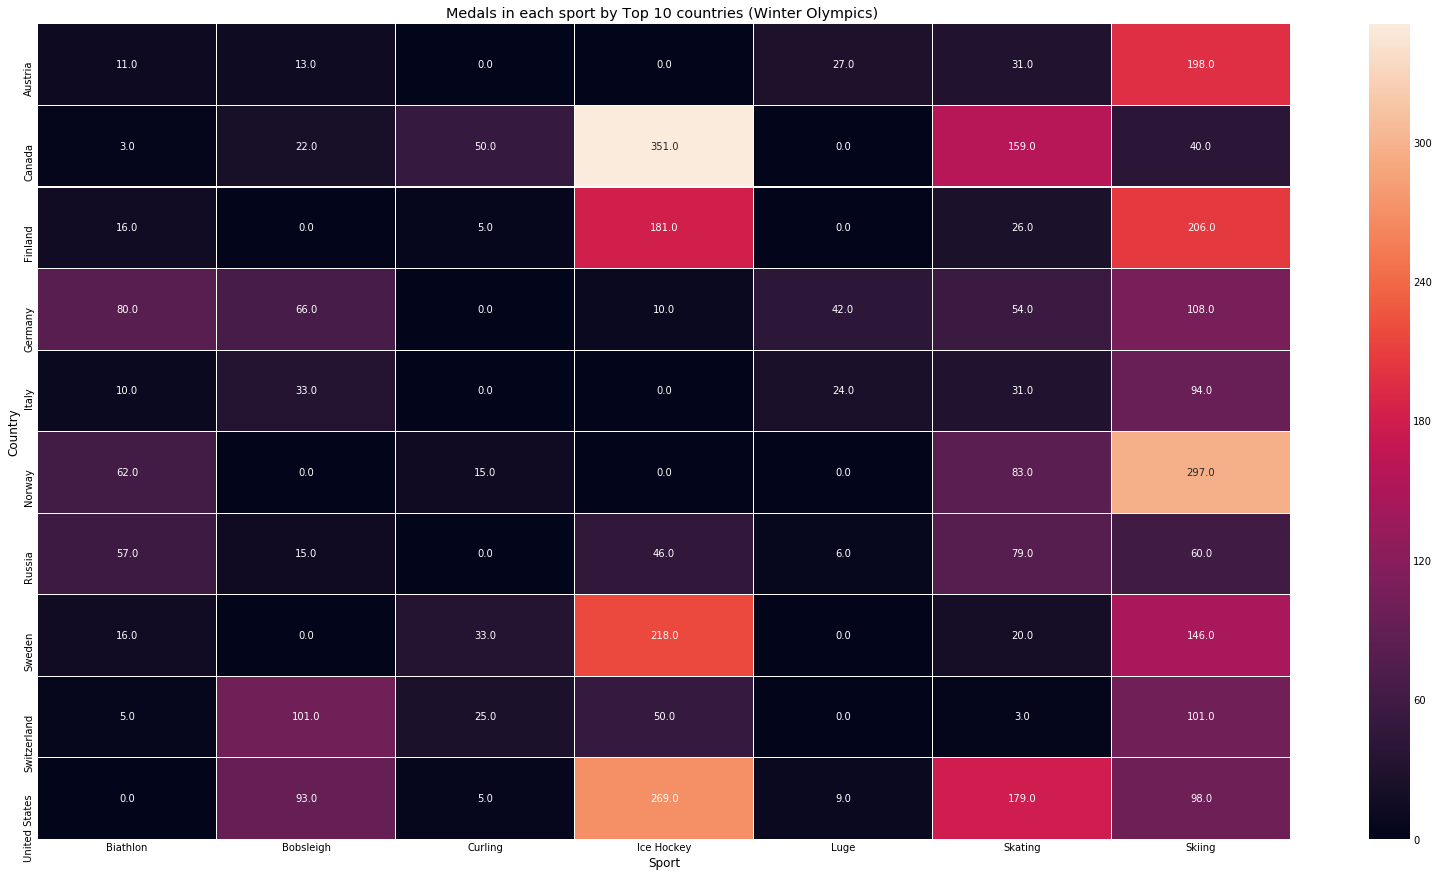

In [15]:
x=winter[winter['Country'].isin(winter['Country'].value_counts()[:10].index)].groupby(['Country','Sport'])['Year'].count().unstack().fillna(0)
plt.figure(figsize=(25,15))
sns.heatmap(x, annot=True, linewidths=0.1,fmt='0.1f')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Medals in each sport by Top 10 countries (Winter Olympics) ')
plt.show() # ta-da!

<p style="page-break-after:always;"></p>

## Plot of no. of medals won by Top Male Atheletes in Summer Olympics

Text(0, 0.5, 'Athlete')

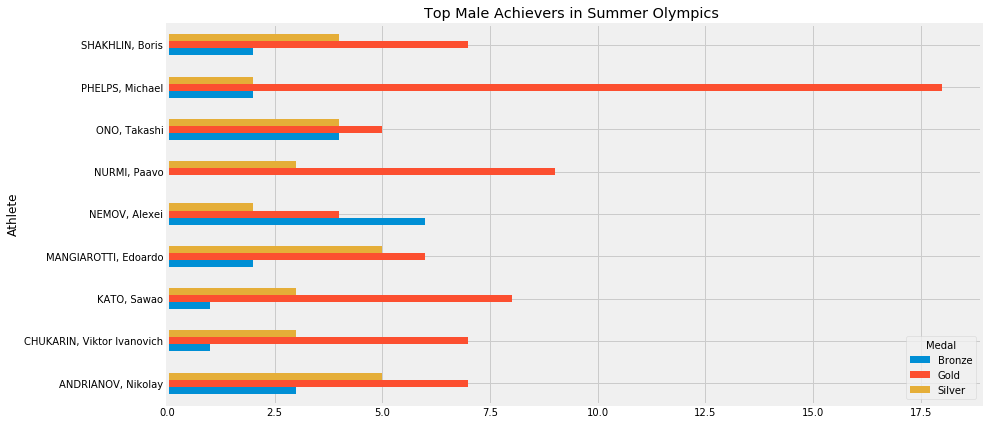

In [16]:
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(figsize=(13,7))
plt.title('Top Male Achievers in Summer Olympics ')
plt.ylabel('Athlete')

<p style="page-break-after:always;"></p>

## Plot of no. of medals won by Top Female Atheletes in Summer Olympics

Text(0, 0.5, 'Athlete')

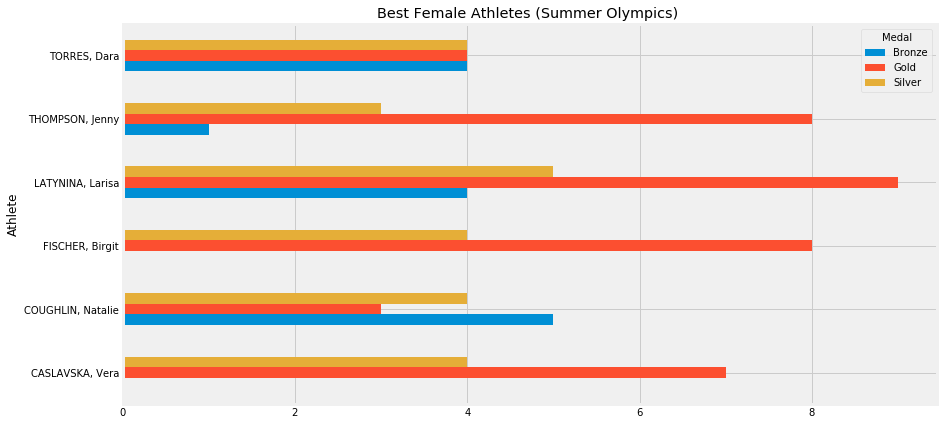

In [17]:
women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:20])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(figsize=(13,7))
plt.title('Best Female Athletes (Summer Olympics) ')
plt.ylabel('Athlete')

<p style="page-break-after:always;"></p>

## Plot of no. of medals won by Top Male Atheletes in Winter Olympics

Text(0, 0.5, 'Athlete')

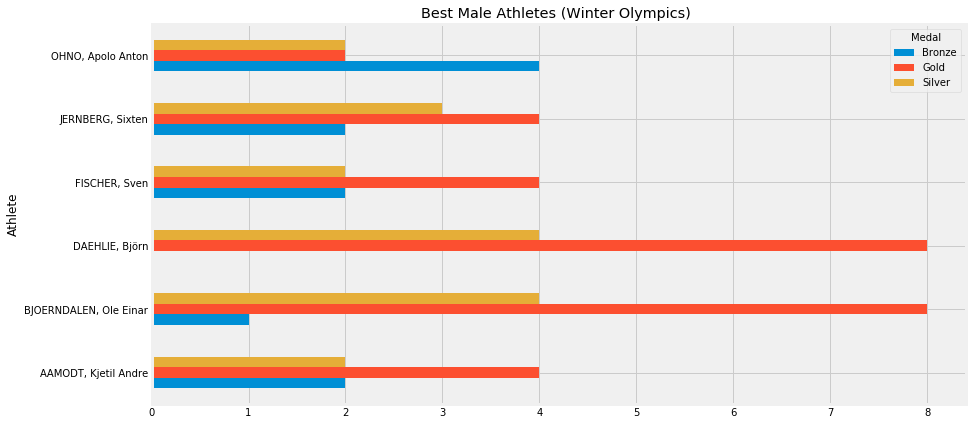

In [18]:
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot('Athlete','Medal','Code')
men.plot.barh(figsize=(13,7))
plt.title('Best Male Athletes (Winter Olympics) ')
plt.ylabel('Athlete')

<p style="page-break-after:always;"></p>

## Plot of no. of medals won by Top Female Atheletes in Winter Olympics


Text(0, 0.5, 'Athlete')

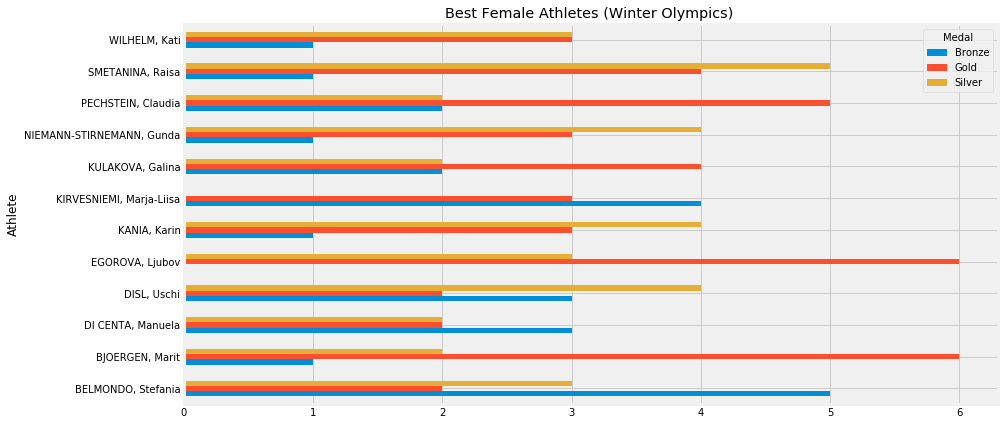

In [19]:
women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:20])]
women=women.pivot('Athlete','Medal','Code')
women.plot.barh(figsize=(13,7))
plt.title('Best Female Athletes (Winter Olympics) ')
plt.ylabel('Athlete')

<p style="page-break-after:always;"></p>

## Distribution of no. of Gold, Silver and Bronze won by India

Text(0.5, 1.0, 'Medals Won By India in Olympics')

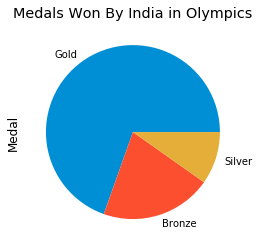

In [20]:
summer.groupby(['Code'])['Medal'].value_counts()['IND'].plot(kind='pie')
plt.title('Medals Won By India in Olympics')

<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by Indian men over years

Text(0, 0.5, 'No of Medals')

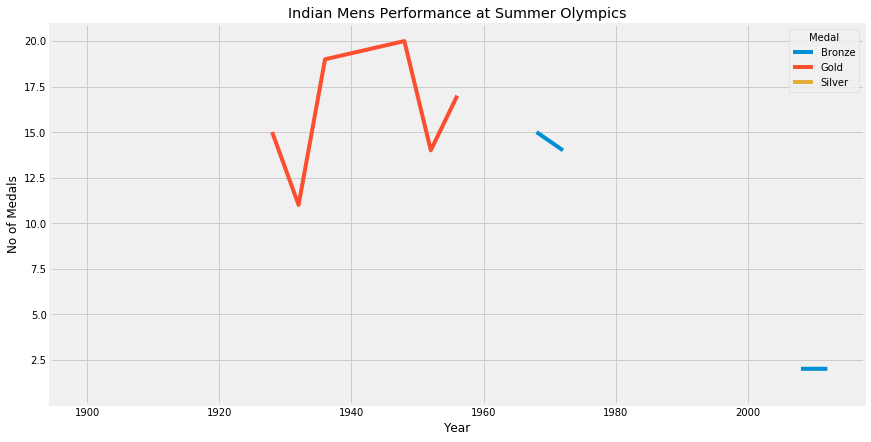

In [21]:
# Growth of Indian medals
ind = summer[(summer['Gender']=='Men')&(summer['Country']=='India')]
ind.groupby(['Year'])['Medal'].value_counts().unstack().plot(figsize=(13,7))
plt.title('Indian Mens Performance at Summer Olympics')
plt.ylabel('No of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by Indian women over years

Text(0, 0.5, 'No of Medals')

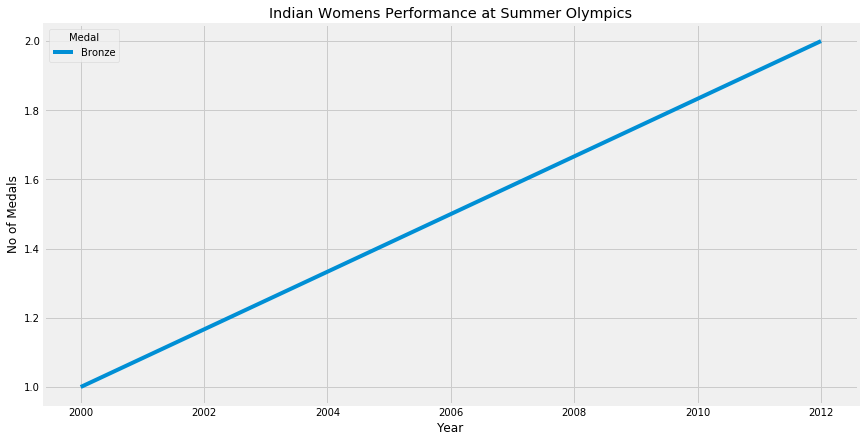

In [22]:
# Growth of Indian medals
ind = summer[(summer['Gender']=='Women')&(summer['Country']=='India')]
ind.groupby(['Year'])['Medal'].value_counts().unstack().plot(figsize=(13,7))
plt.title('Indian Womens Performance at Summer Olympics')
plt.ylabel('No of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by Indian men in different games

Text(0.5, 0, 'No. of Medals')

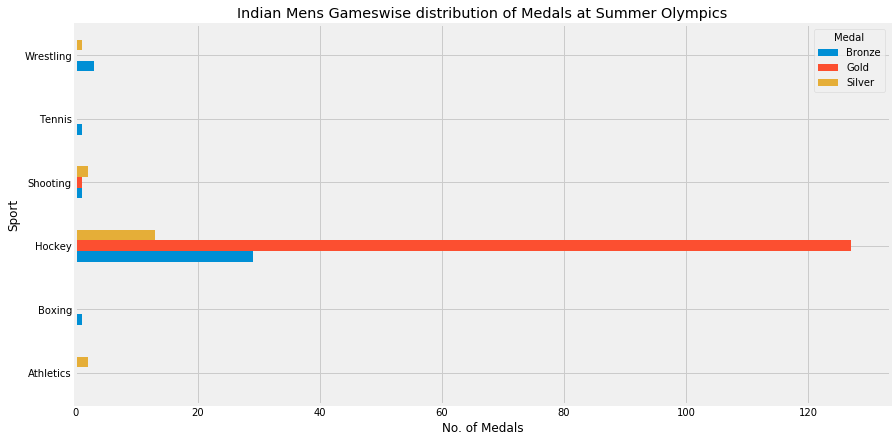

In [23]:
# Growth of Indian medals
ind = summer[(summer['Gender']=='Men')&(summer['Country']=='India')]
ind.groupby(['Sport'])['Medal'].value_counts().unstack().plot.barh(figsize=(13,7))
plt.title('Indian Mens Gameswise distribution of Medals at Summer Olympics')
plt.ylabel('Sport')
plt.xlabel('No. of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by Indian women in different games

Text(0.5, 0, 'No. of Medals')

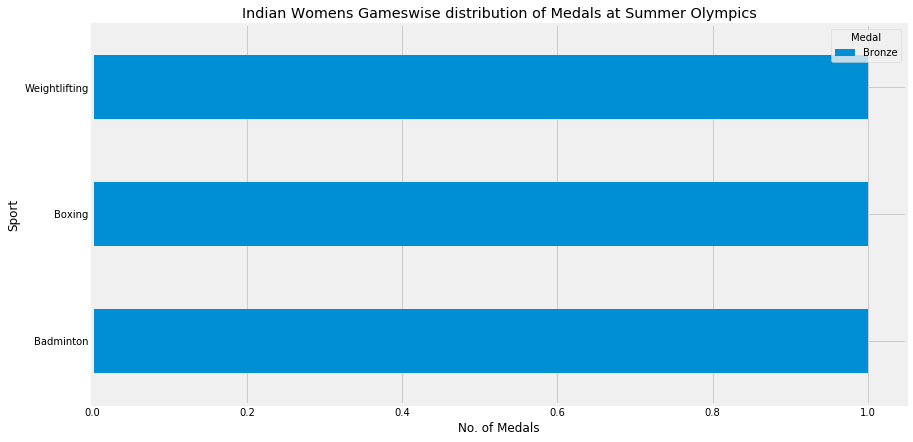

In [24]:
ind = summer[(summer['Gender']=='Women')&(summer['Country']=='India')]
ind.groupby(['Sport'])['Medal'].value_counts().unstack().plot.barh(figsize=(13,7))
plt.title('Indian Womens Gameswise distribution of Medals at Summer Olympics')
plt.ylabel('Sport')
plt.xlabel('No. of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by US men in different games

Text(0.5, 0, 'No. of Medals')

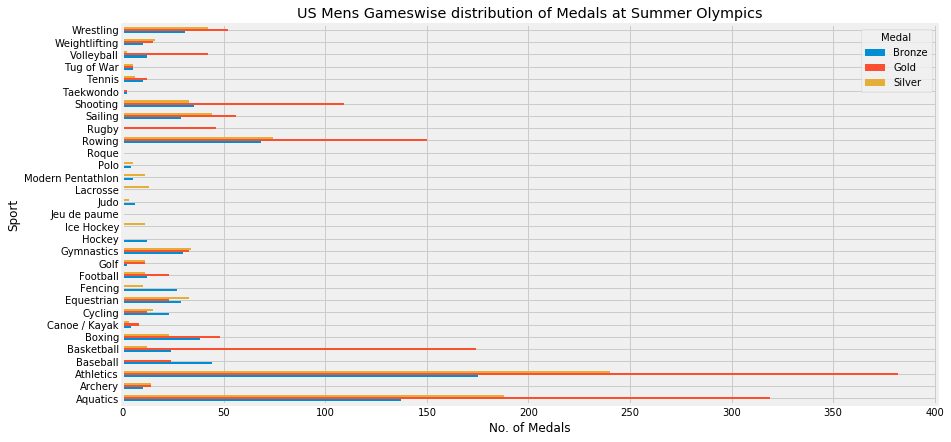

In [25]:
ind = summer[(summer['Gender']=='Men')&(summer['Country']=='United States')]
ind.groupby(['Sport'])['Medal'].value_counts().unstack().plot.barh(figsize=(13,7))
plt.title('US Mens Gameswise distribution of Medals at Summer Olympics')
plt.ylabel('Sport')
plt.xlabel('No. of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by US women in different games

Text(0.5, 0, 'No. of Medals')

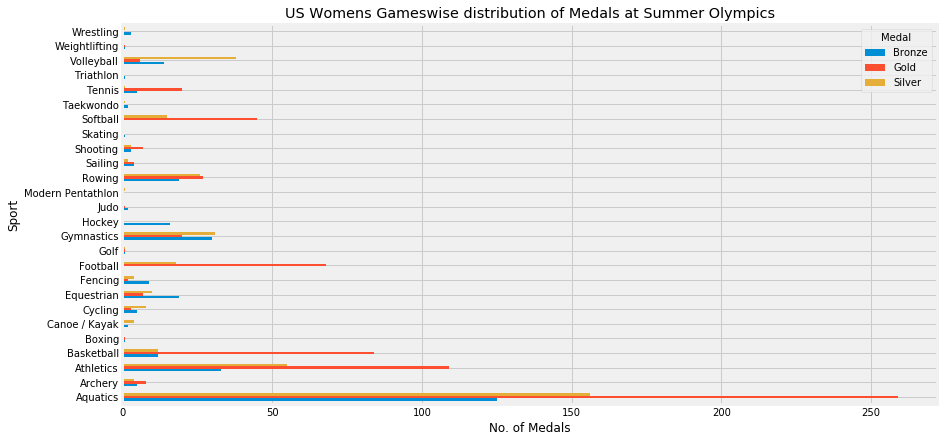

In [26]:
ind = summer[(summer['Gender']=='Women')&(summer['Country']=='United States')]
ind.groupby(['Sport'])['Medal'].value_counts().unstack().plot.barh(figsize=(13,7))
plt.title('US Womens Gameswise distribution of Medals at Summer Olympics')
plt.ylabel('Sport')
plt.xlabel('No. of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by US men in over years

Text(0, 0.5, 'No of Medals')

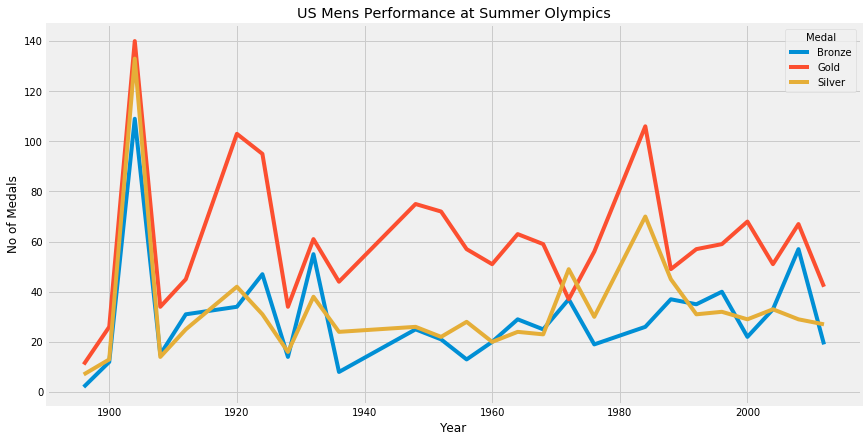

In [27]:
ind = summer[(summer['Gender']=='Men')&(summer['Country']=='United States')]
ind.groupby(['Year'])['Medal'].value_counts().unstack().plot(figsize=(13,7))
plt.title('US Mens Performance at Summer Olympics')
plt.ylabel('No of Medals')


<p style="page-break-after:always;"></p>

## Plot of no. of different medals won by US women in over years

Text(0, 0.5, 'No of Medals')

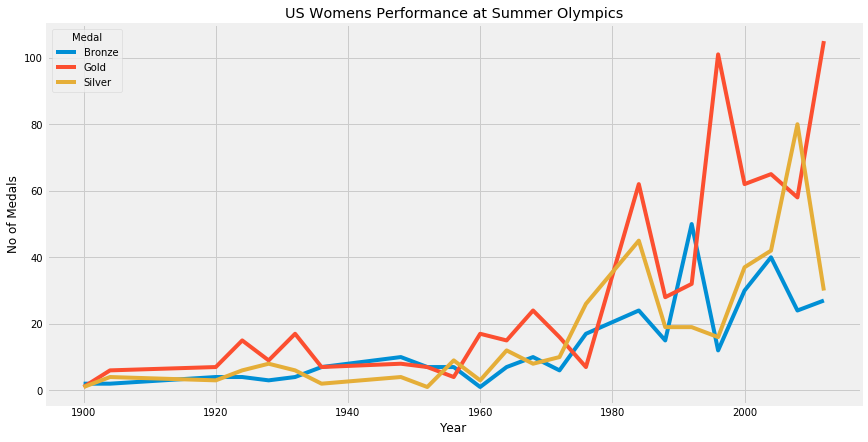

In [28]:
ind = summer[(summer['Gender']=='Women')&(summer['Country']=='United States')]
ind.groupby(['Year'])['Medal'].value_counts().unstack().plot(figsize=(13,7))
plt.title('US Womens Performance at Summer Olympics')
plt.ylabel('No of Medals')


---